In [8]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

0: sample; 1: air

In [9]:
def get_dataframe(matrix, dir="whisky", save_xlsx=False):
    with open(f"raw_data_{dir}/matrix_{matrix}/{matrix}.bmerawdata") as f:
        j = json.load(f)
    column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
    df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)

    if save_xlsx:
        df.to_excel(f"raw_data_{dir}/matrix_{matrix}/{matrix}.xlsx")

    return df

In [47]:
# df = get_dataframe(1, save_xlsx=True)

In [10]:
def build_sensor_data(df):
    df["Date"] = pd.to_datetime(
        df["Real time clock"],
        unit="s",
        utc=True).map(lambda x: x.tz_convert("Europe/Istanbul"))
    df["Date"] = df["Date"].dt.tz_localize(None)

    sensor_indexes = sorted(df["Sensor Index"].unique())

    sensors = {}
    for i in sensor_indexes:
        sensors[i] = {}
        sensor = df[df["Sensor Index"] == i]
        heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
        for j in heater_indexes:
            sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]

    return sensors

In [11]:
def build_raw_data_pickle(dir="whisky", save_pickle=False):
    sensor_data = {}
    for matrix in range(2):
        df = get_dataframe(matrix)
        sensor_data[f"mat_{matrix}"] = build_sensor_data(df)

    if save_pickle:
        with open(f"raw_sensor_data_{dir}.pkl", "wb") as f:
            pickle.dump(sensor_data, f)

    return sensor_data

In [13]:
sensor_data = build_raw_data_pickle(dir="whisky", save_pickle=True)

In [14]:
sensor_data["mat_0"][0][0]

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code,Date
0,0,355899974,6677,1766559865,20.924713,925.290527,37.213123,4914217.0,0,1,1,0,0,2025-12-24 10:04:25
78,0,355899974,25054,1766559884,25.256891,925.370422,32.452873,102400000.0,0,1,1,0,0,2025-12-24 10:04:44
161,0,355899974,43277,1766559902,26.034481,925.412109,30.728813,102400000.0,0,1,1,0,0,2025-12-24 10:05:02
244,0,355899974,61608,1766559920,26.686184,925.388489,29.284567,102400000.0,0,1,1,0,0,2025-12-24 10:05:20
327,0,355899974,79882,1766559939,27.241617,925.390381,28.640432,102400000.0,0,1,1,0,0,2025-12-24 10:05:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82700,0,355899974,18813805,1766578675,35.087162,925.238525,23.108416,102400000.0,0,1,1,0,0,2025-12-24 15:17:55
82775,0,355899974,18832192,1766578693,35.106911,925.230835,23.099174,102400000.0,0,1,1,0,0,2025-12-24 15:18:13
82844,0,355899974,18850564,1766578712,35.124195,925.234924,23.148491,102400000.0,0,1,1,0,0,2025-12-24 15:18:32
82923,0,355899974,18868972,1766578730,35.134071,925.244873,23.090469,102400000.0,0,1,1,0,0,2025-12-24 15:18:50


In [15]:
def plot_sensor(matrix, sensor_idx, sensor_data):
    plt.figure(figsize=(8, 4))
    plt.title(f"Matrix {matrix}, Sensor {sensor_idx}")
    plt.yscale("log")
    for hp_idx, val in sensor_data[f"mat_{matrix}"][sensor_idx].items():
        resistance = val["Resistance Gassensor"].values
        time_ms = val["Time Since PowerOn"].values
        plt.plot(time_ms, resistance, label=f"HP {hp_idx}")
    plt.legend()
    plt.show()

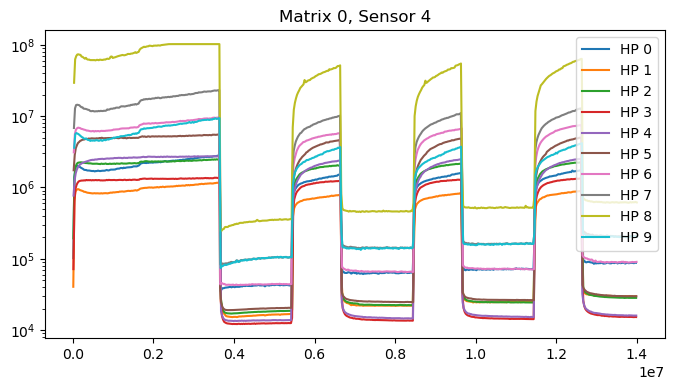

In [17]:
plot_sensor(0, 4, sensor_data)

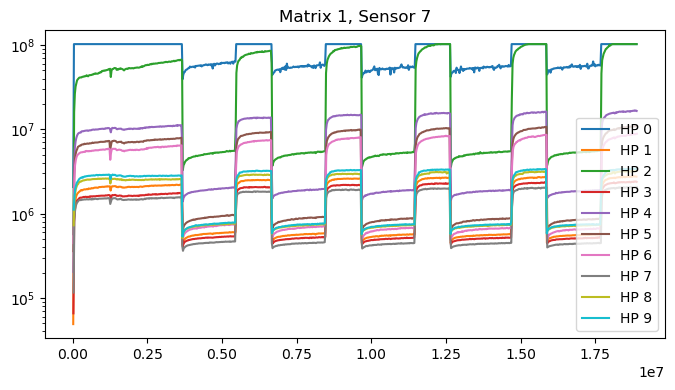

In [32]:
plot_sensor(1, 7, sensor_data)